In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read csv
heart = pd.read_csv('heart.csv', delimiter = ",")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#dataset info
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#dataset description
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#dataset index 0-4
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#checking null(s)
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

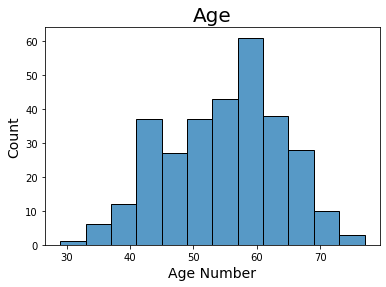

In [8]:
#Data Visualizations

#Age
sns.histplot(heart['age'])
plt.title('Age', fontsize=20)
plt.xlabel('Age Number', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

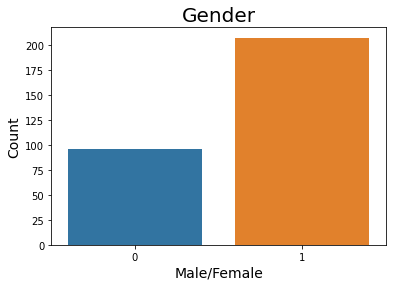

In [9]:
#Age
sns.countplot(heart['sex'])
plt.title('Gender', fontsize=20)
plt.xlabel('Male/Female', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

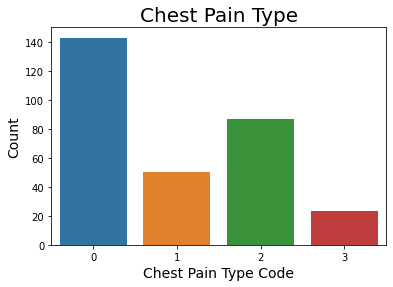

In [95]:
#Chest Pain Type
sns.countplot(heart['cp'])
plt.title('Chest Pain Type', fontsize=20)
plt.xlabel('Chest Pain Type Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

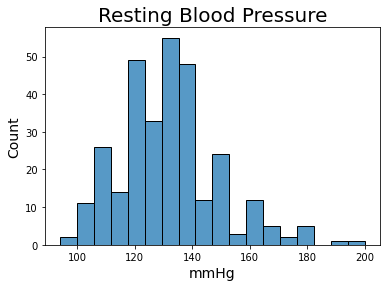

In [96]:
#Resting Blood Pressure
sns.histplot(heart['trtbps'])
plt.title('Resting Blood Pressure', fontsize=20)
plt.xlabel('mmHg', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

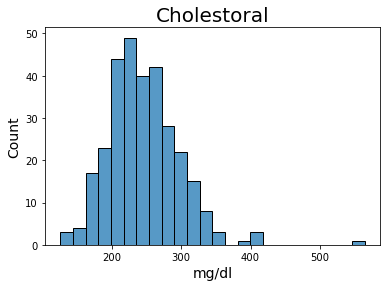

In [97]:
#Cholestoral 
sns.histplot(heart['chol'])
plt.title('Cholestoral', fontsize=20)
plt.xlabel('mg/dl', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

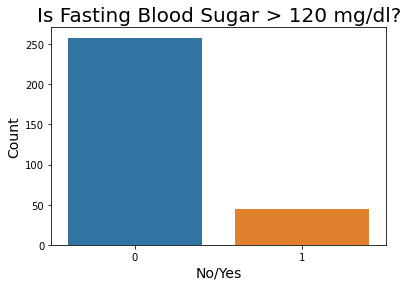

In [98]:
#Fasting Blood Sugar
sns.countplot(heart['fbs'])
plt.title('Is Fasting Blood Sugar > 120 mg/dl?', fontsize=20)
plt.xlabel('No/Yes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

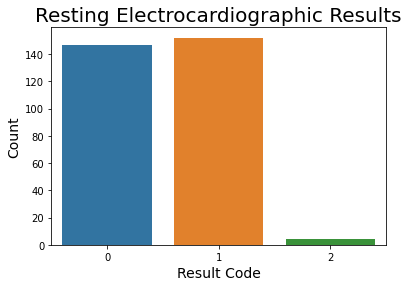

In [99]:
#Resting Electrocardiographic Results
sns.countplot(heart['restecg'])
plt.title('Resting Electrocardiographic Results', fontsize=20)
plt.xlabel('Result Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

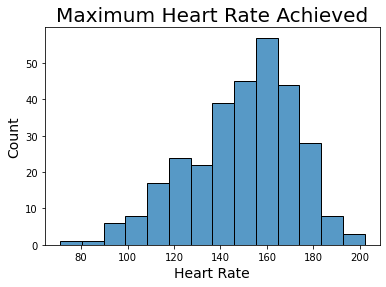

In [100]:
#maximum heart rate achieved 
sns.histplot(heart['thalachh'])
plt.title('Maximum Heart Rate Achieved', fontsize=20)
plt.xlabel('Heart Rate', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

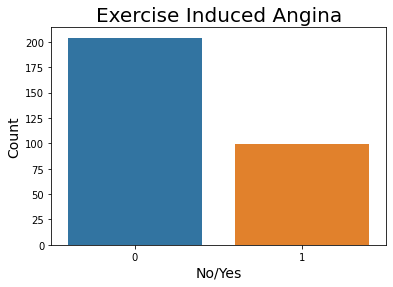

In [104]:
#Exercise Induced Angina
sns.countplot(heart['exng'])
plt.title('Exercise Induced Angina', fontsize=20)
plt.xlabel('No/Yes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

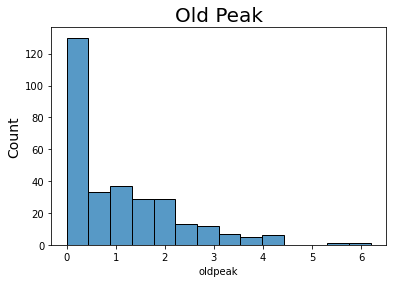

In [103]:
#Old Peak
sns.histplot(heart['oldpeak'])
plt.title('Old Peak', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.show()

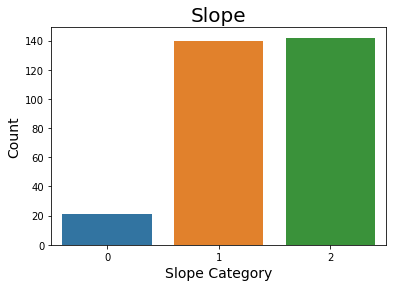

In [105]:
#Slope
sns.countplot(heart['slp'])
plt.title('Slope', fontsize=20)
plt.xlabel('Slope Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

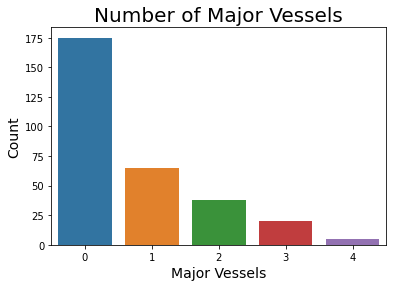

In [106]:
#Number of Major Vessels
sns.countplot(heart['caa'])
plt.title('Number of Major Vessels', fontsize=20)
plt.xlabel('Major Vessels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

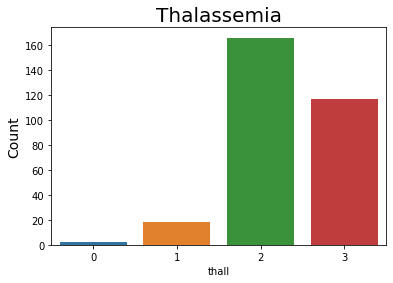

In [107]:
#Thalassemia 
sns.countplot(heart['thall'])
plt.title('Thalassemia', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.show()

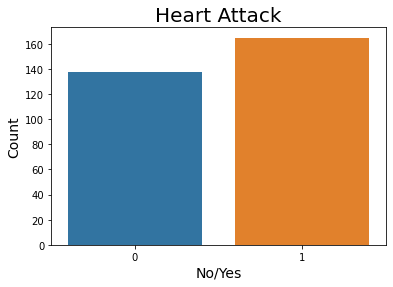

In [108]:
#Output 
sns.countplot(heart['output'])
plt.title('Heart Attack', fontsize=20)
plt.xlabel('No/Yes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Dataset Correlation')

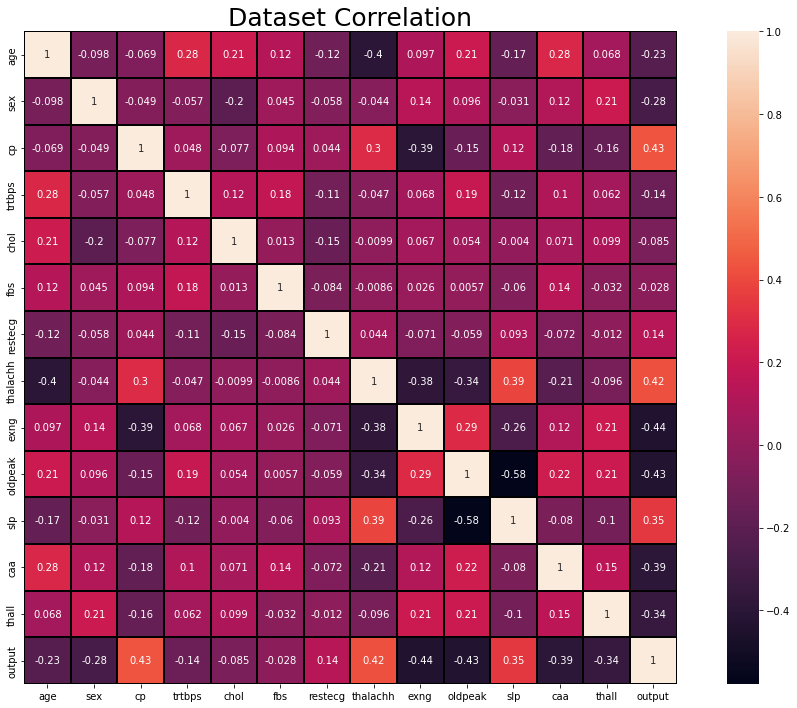

In [92]:
#Correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(heart.corr(), linewidth=0.25, vmax=1, square=True, linecolor='black', annot=True)
plt.title('Dataset Correlation', fontsize=25)

In [10]:
#training and test data
X = heart[['cp', 'restecg', 'thalachh', 'slp']]
Y = heart['output']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

print('Train and Test Shape:')
print('X_train : ', X_train.shape)
print('Y_train : ', y_train.shape)
print('X_test  : ', X_test.shape)
print('Y_test  : ', y_test.shape)

Train and Test Shape:
X_train :  (242, 4)
Y_train :  (242,)
X_test  :  (61, 4)
Y_test  :  (61,)


In [11]:
#Random Forest

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rforest.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rforest.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 0.95
Accuracy of Random Forest Classifier on test set: 0.72


In [12]:
rforest_score = cross_val_score(rforest, X_train, y_train, cv=10)

#Random Forest after Cross Validation
print('Random Forest Classifier Cross Validation Accuracy Score:', rforest_score)
rforest_score = pd.Series(rforest_score)
rforest_score.min(), rforest_score.mean(), rforest_score.max()

Random Forest Classifier Cross Validation Accuracy Score: [0.68       0.6        0.54166667 0.83333333 0.66666667 0.79166667
 0.625      0.625      0.625      0.75      ]


(0.5416666666666666, 0.6738333333333333, 0.8333333333333334)

In [13]:
#Decision Tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(dtree.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 0.95
Accuracy of Decision Tree Classifier on test set: 0.66


In [14]:
dtree_score = cross_val_score(dtree, X_train, y_train, cv=10)

#Decision Tree after Cross Validation
print('Decision Tree Cross Validation Accuracy Score:', dtree_score)
dtree_score = pd.Series(dtree_score)
dtree_score.min(), dtree_score.mean(), dtree_score.max()

Decision Tree Cross Validation Accuracy Score: [0.64       0.64       0.54166667 0.75       0.66666667 0.54166667
 0.66666667 0.58333333 0.625      0.625     ]


(0.5416666666666666, 0.6279999999999999, 0.75)

In [24]:
#KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.79
Accuracy of KNeighbors Classifier on test set: 0.72


In [10]:
knn_score = cross_val_score(knn, X_train, y_train, cv=10)

#KNeighbors Classifier after Cross Validation
print('KNeighbors Classifier Cross Validation Accuracy Score:', knn_score)
knn_score = pd.Series(knn_score)
knn_score.min(), knn_score.mean(), knn_score.max()

KNeighbors Classifier Cross Validation Accuracy Score: [0.6        0.72       0.54166667 0.625      0.66666667 0.54166667
 0.83333333 0.70833333 0.58333333 0.83333333]


(0.5416666666666666, 0.6653333333333331, 0.8333333333333334)

In [25]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.74
Accuracy of Logistic Regression classifier on test set: 0.82


In [12]:
logreg_score = cross_val_score(logreg, X_train, y_train, cv=10)

#Logistic Regression after Cross Validation
print('Logistic Regression Cross Validation Accuracy Score:', logreg_score)
logreg_score = pd.Series(logreg_score)
logreg_score.min(), logreg_score.mean(), logreg_score.max()

Logistic Regression Cross Validation Accuracy Score: [0.68       0.72       0.5        0.75       0.83333333 0.75
 0.70833333 0.75       0.66666667 0.91666667]


(0.5, 0.7275, 0.9166666666666666)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        27
           1       0.71      0.65      0.68        34

    accuracy                           0.66        61
   macro avg       0.65      0.66      0.65        61
weighted avg       0.66      0.66      0.66        61



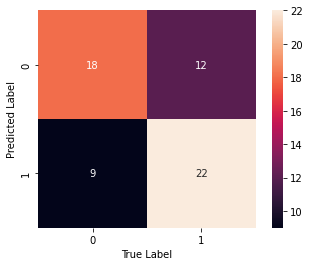

In [21]:
#Confusion Matrix

#Decision Tree
y_pred_dtree = dtree.predict(X_test)

dtree_matrix = metrics.confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(dtree_matrix.T, annot=True, square=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

#Classification Report

print('\nDecision Tree Classification Report:')
cr = metrics.classification_report(y_test, y_pred_dtree)
print(cr)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        27
           1       0.74      0.76      0.75        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



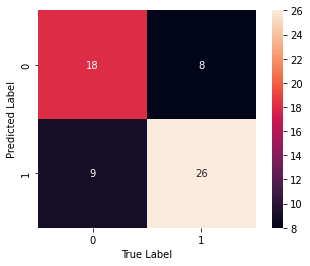

In [28]:
#Random Forest
y_pred_rforest = rforest.predict(X_test)

rforest_matrix = metrics.confusion_matrix(y_test, y_pred_rforest)
sns.heatmap(rforest_matrix.T, annot=True, square=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

#Classification Report

print('\nRandom Forest Classification Report:')
cr = metrics.classification_report(y_test, y_pred_rforest)
print(cr)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71        27
           1       0.79      0.68      0.73        34

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.73      0.72      0.72        61



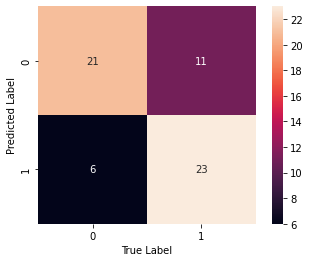

In [29]:
#KNN
y_pred_knn = knn.predict(X_test)

knn_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
sns.heatmap(knn_matrix.T, annot=True, square=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

#Classification Report

print('\nKNN Classification Report:')
cr = metrics.classification_report(y_test, y_pred_knn)
print(cr)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        27
           1       0.71      0.65      0.68        34

    accuracy                           0.66        61
   macro avg       0.65      0.66      0.65        61
weighted avg       0.66      0.66      0.66        61



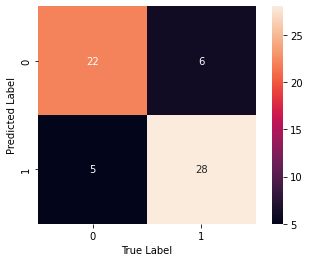

In [30]:
#Logistic Regression
y_pred_logreg = logreg.predict(X_test)

logreg_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(logreg_matrix.T, annot=True, square=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

#Classification Report

print('\nLogistic Regression Classification Report:')
cr = metrics.classification_report(y_test, y_pred_dtree)
print(cr)

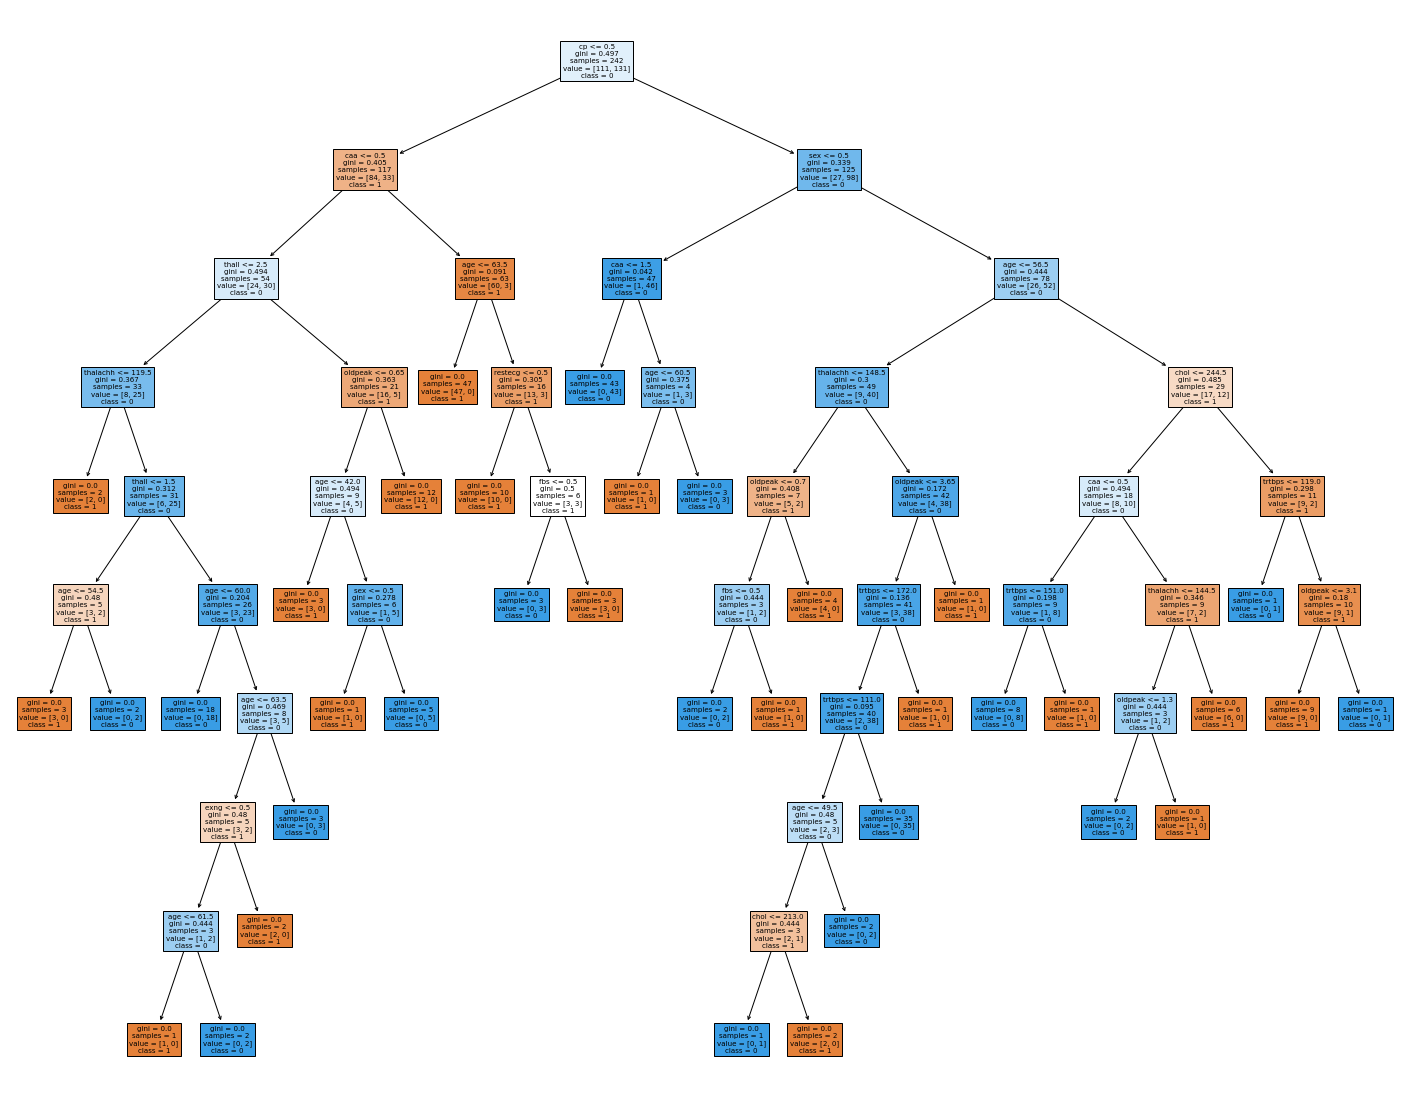

In [87]:
#Plotting Decision Tree Algorithim
feature_names = X.columns[:14]
target_names = Y.unique().tolist()

target_names = [str(x) for x in target_names]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names = feature_names, class_names = target_names, filled=True)

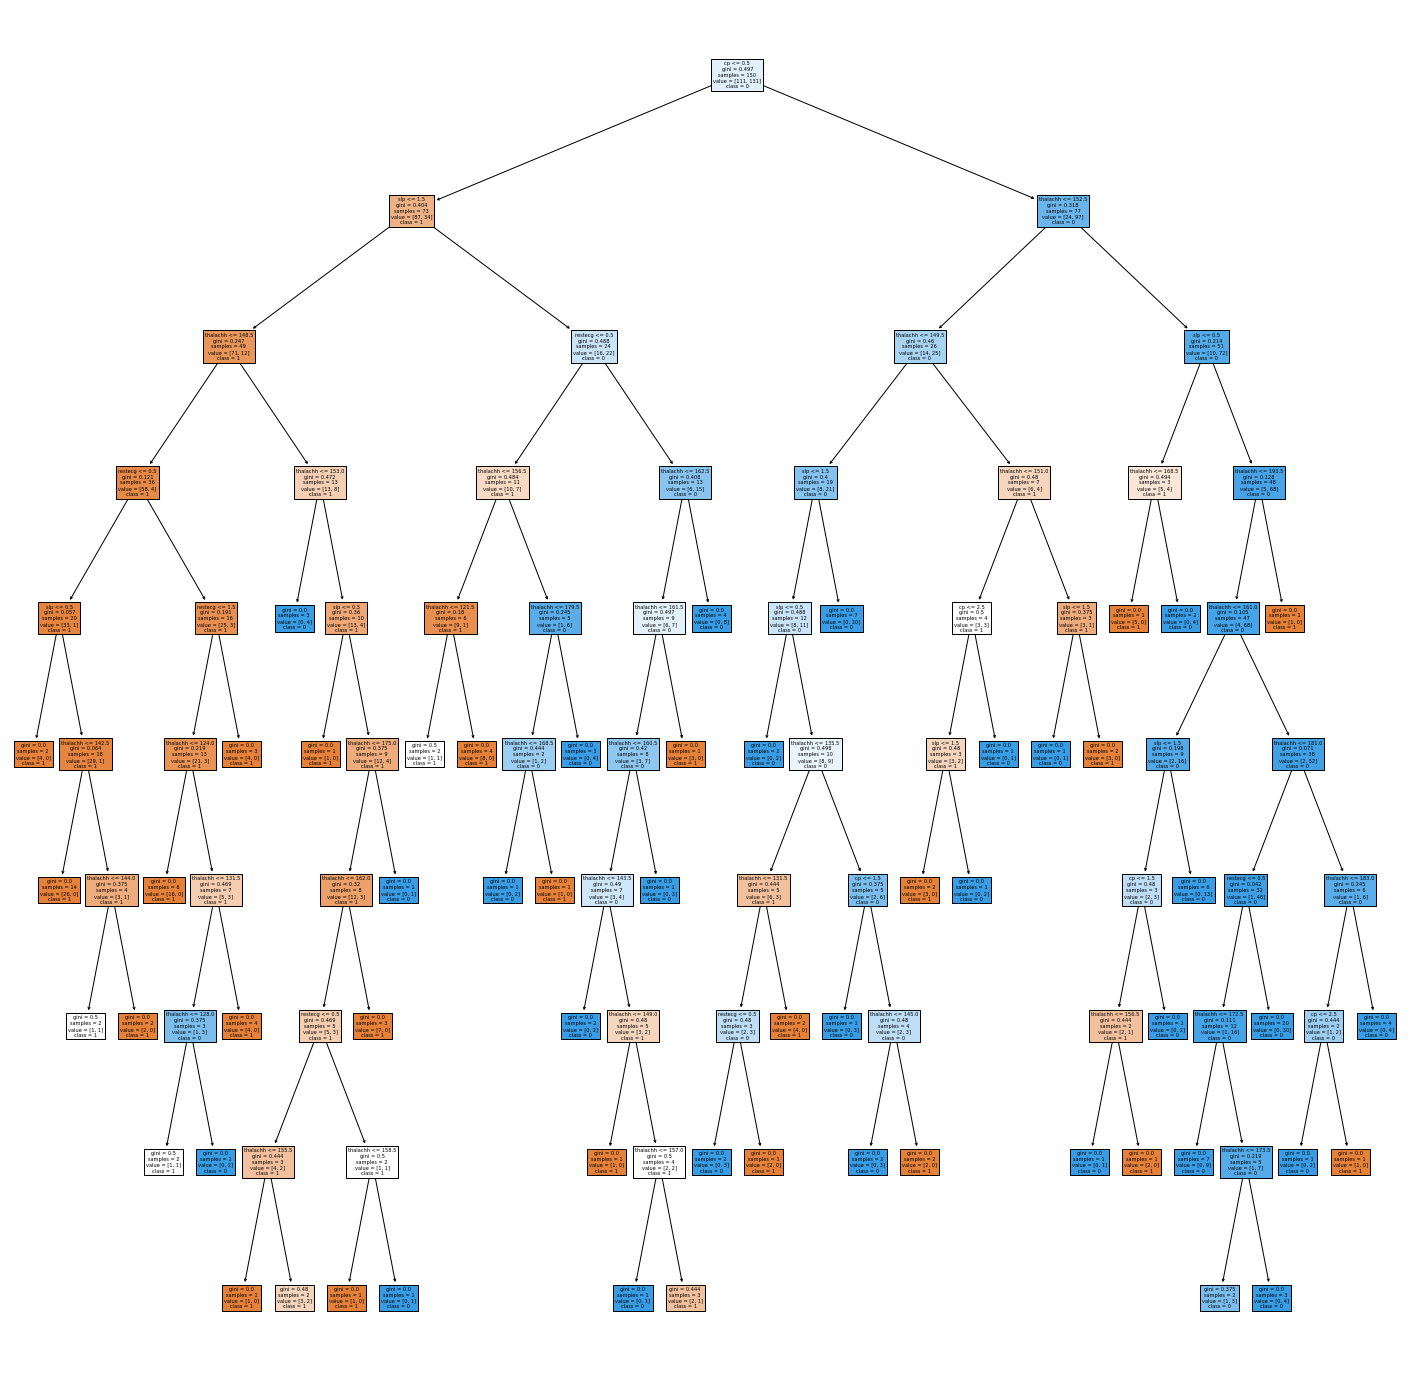

In [18]:
#Plotting Random Forest Algorithim
feature_names = X.columns[:14]
target_names = Y.unique().tolist()

target_names = [str(x) for x in target_names]

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(rforest.estimators_[0], feature_names = feature_names, class_names = target_names, filled=True)